<a href="https://colab.research.google.com/github/samsomsabu/machine_learning/blob/main/2348549_multi_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load the dataset
df = pd.read_csv('/content/delivery - delivery.csv')


In [3]:

# Display basic information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n.prod    25 non-null     int64  
 1   distance  25 non-null     int64  
 2   delTime   25 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 728.0 bytes
None


In [4]:

# Display basic statistics
print(df.describe())



          n.prod     distance    delTime
count  25.000000    25.000000  25.000000
mean    8.760000   409.280000  22.384000
std     6.881618   325.188089  15.524903
min     2.000000    36.000000   8.000000
25%     4.000000   150.000000  13.750000
50%     7.000000   330.000000  18.110000
75%    10.000000   605.000000  21.500000
max    30.000000  1460.000000  79.240000


In [5]:

# Check for missing values
print(df.isnull().sum())

n.prod      0
distance    0
delTime     0
dtype: int64


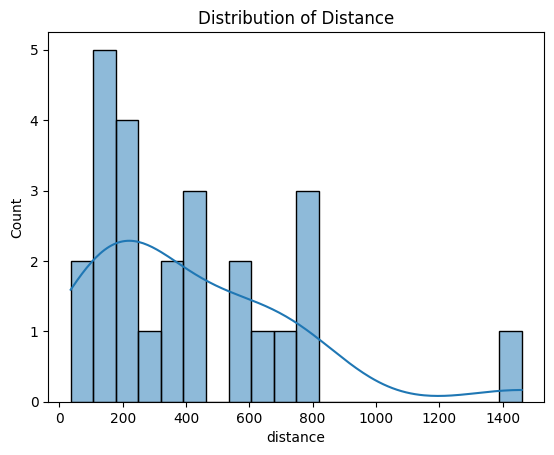

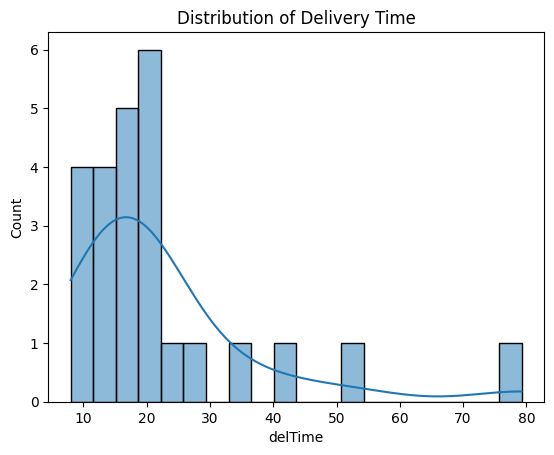

In [6]:

# Visualize the distribution of 'distance' and 'delTime'
sns.histplot(df['distance'], bins=20, kde=True)
plt.title('Distribution of Distance')
plt.show()

sns.histplot(df['delTime'], bins=20, kde=True)
plt.title('Distribution of Delivery Time')
plt.show()


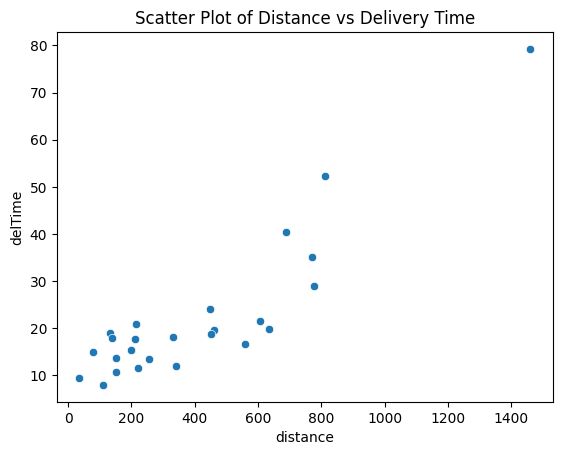

In [7]:

# Scatter plot between 'distance' and 'delTime'
sns.scatterplot(x='distance', y='delTime', data=df)
plt.title('Scatter Plot of Distance vs Delivery Time')
plt.show()

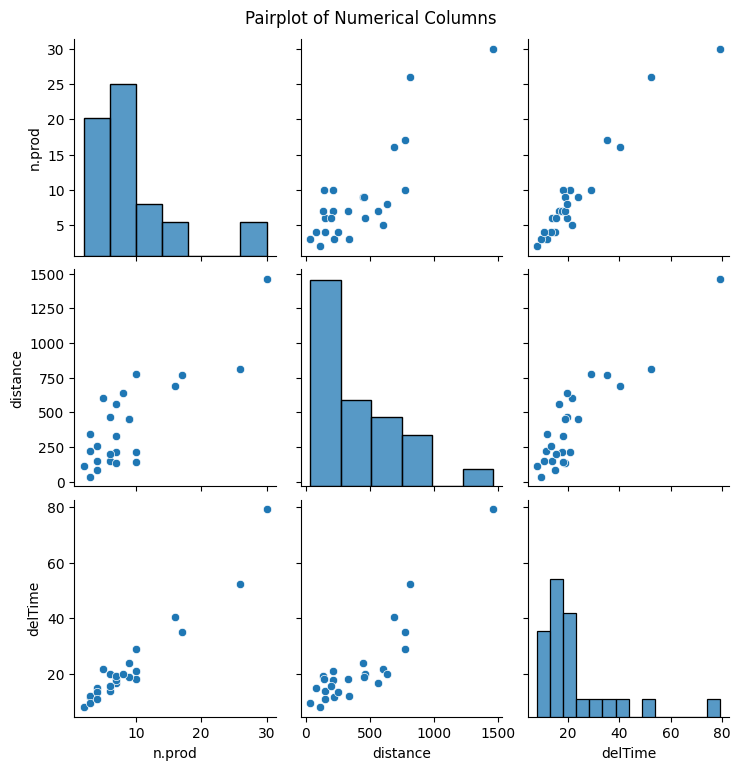

In [8]:
# Pairplot to visualize relationships between all numerical columns
sns.pairplot(df)
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

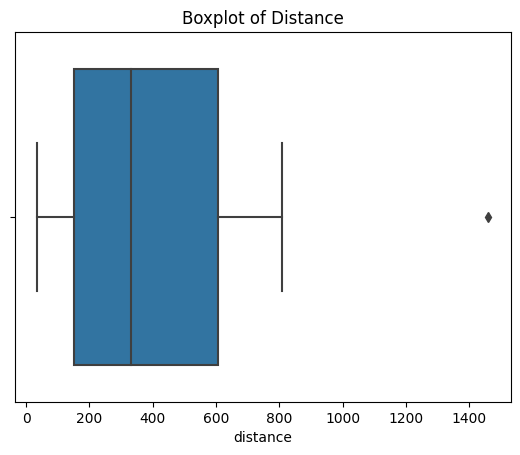

In [9]:
# Boxplot to identify outliers in 'distance' and 'delTime'
sns.boxplot(x='distance', data=df)
plt.title('Boxplot of Distance')
plt.show()

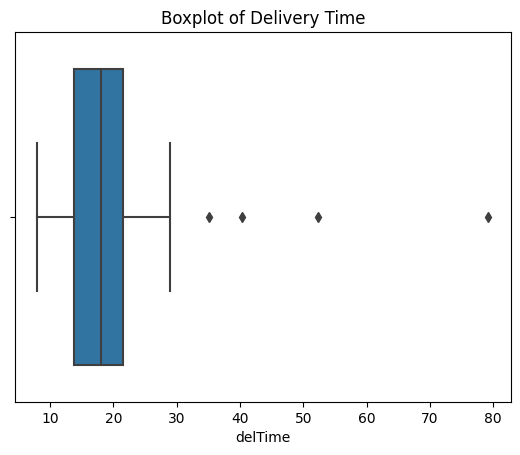

In [10]:
sns.boxplot(x='delTime', data=df)
plt.title('Boxplot of Delivery Time')
plt.show()

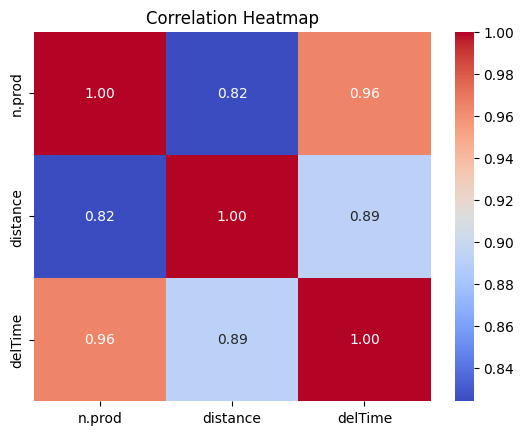

In [11]:
# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

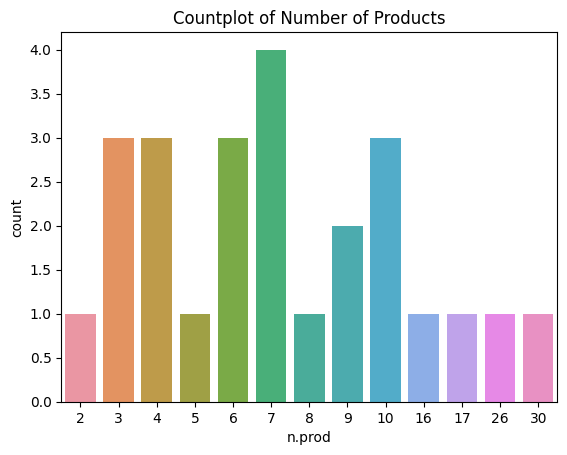

In [12]:
# Countplot for categorical variable 'n.prod'
sns.countplot(x='n.prod', data=df)
plt.title('Countplot of Number of Products')
plt.show()


In [14]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np


In [15]:

# Assume 'n.prod' and 'distance' are your independent variables, and 'delTime' is the dependent variable
X = df[['n.prod', 'distance']]
y = df['delTime']


In [16]:

# Add a constant term to the independent variables
X = sm.add_constant(X)


In [17]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:

# Fit the model on the training data
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                delTime   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     218.4
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           7.52e-13
Time:                        10:52:06   Log-Likelihood:                -43.330
No. Observations:                  20   AIC:                             92.66
Df Residuals:                      17   BIC:                             95.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5598      0.930      4.905      0.0

In [19]:

# Make predictions on the test set
y_pred = model.predict(X_test)


In [20]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 6.667334268976897


In [22]:

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 6.667334268976944
